In [51]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
df= pd.DataFrame(pd.read_csv("C:/Users/Sajal Mittal/Desktop/Advertising.csv"))
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [54]:
df.drop_duplicates()
df.dropna(inplace=True)
corr=df.corr(method='pearson')

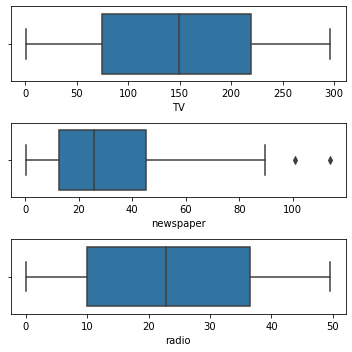

In [55]:
#outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

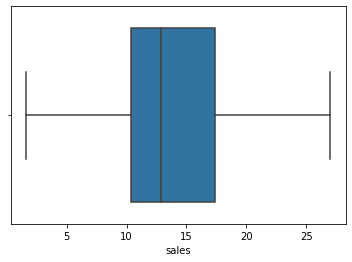

In [56]:
sns.boxplot(df['sales'])
plt.show()

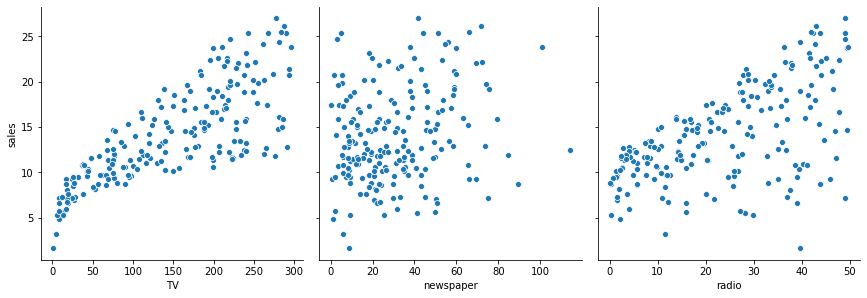

In [57]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

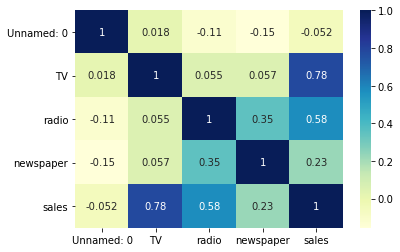

In [58]:
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

In [59]:
df.hist(bins=10,figsize=(10,10))
plt.show()

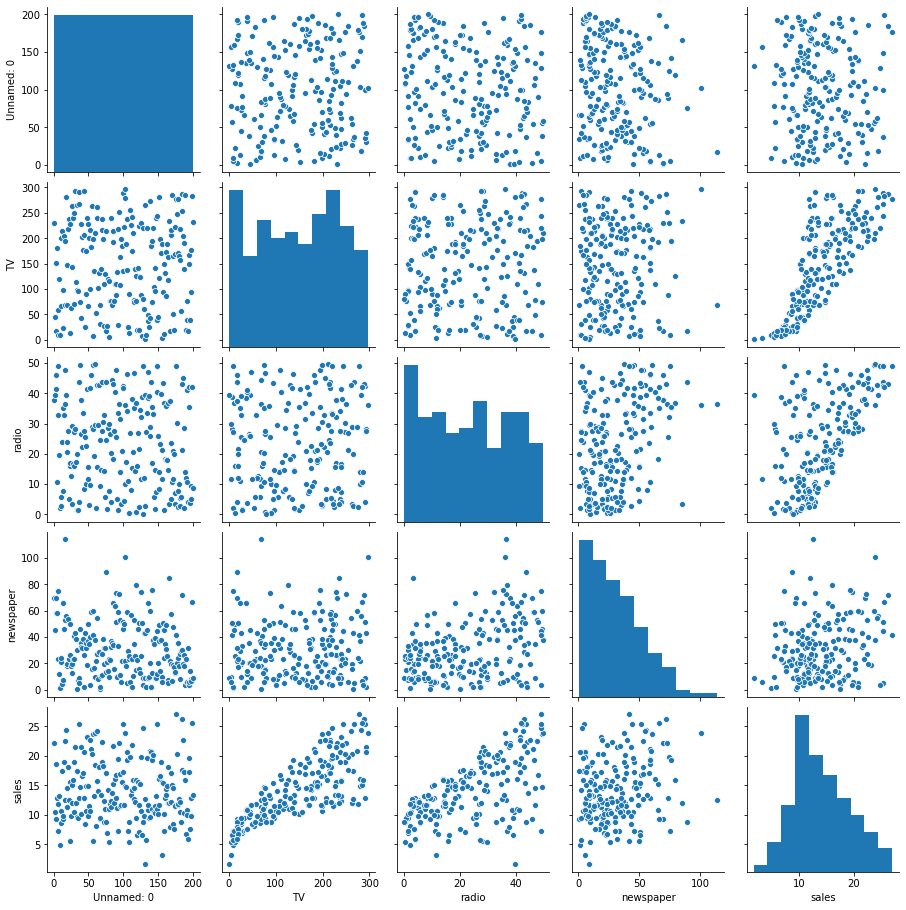

In [60]:
sns.pairplot(df,size=2.5)
plt.show()

In [26]:
feature_cols=df.columns[:3]   
X=df[feature_cols]
result_cols= df.columns[3:]
Y=df[result_cols]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(80, 2)

In [37]:
linear = LinearRegression()
linear.fit(X_train,y_train)

print("linear regression bias or intercept   => ",linear.intercept_) 
print("linear regression coefficient         => ",linear.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [23.84305015  3.01501789]
linear regression coefficient         =>  [[-0.05273971  0.02388931  0.36870216]
 [-0.00078986  0.04336627  0.20391755]]
feature columns                       =>  Index(['Unnamed: 0', 'TV', 'radio'], dtype='object')


In [38]:
y_hat = linear.predict(X_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )


13.753894044286241


In [42]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear= LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6978483071050232

In [44]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6985874083552148

In [46]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = lnrg.predict(X_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.8478746632580214

In [48]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    X_train,X_test,y_train,y_test=train_test_split(X,Y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    y_hat = linear.predict(X_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.979652153295066

In [49]:
feature_cols = ['TV','radio','newspaper']
X=df[feature_cols]
Y=df.sales
linear = LinearRegression()

scores=cross_val_score(linear,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051797


In [50]:
# with some features
feature_cols = ['TV','radio']
X=df[feature_cols]
Y=df.sales
linear = LinearRegression()

scores=cross_val_score(linear,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766


In [62]:
import statsmodels.api as sm
X=df.iloc[:,:-1].values
Y=df.iloc[:, -1].values

In [66]:
X2=sm.add_constant(X)
est=sm.OLS(Y,X2)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.94e-95
Time:                        10:48:19   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.000       2.228       3.783
x1            -0.0006      0.002     -0.276      0.783      -0.005       0.004
x2             0.0458      0.001     32.725      0.000       0.043       0.049
x3             0.1884      0.009     21.784      0.000       0.171       0.205
x4            -0.0012      0.006     -0.210      0.834      -0.013       0.010
==============================================================================
Omnibus:                       60.267   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.423
Skew:                          -1.325   Prob(JB):                     2.17e-33
Kurtosis:                       6.320   Cond. No.                         653.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. P-value is very Low for Tv and Radio.This means that there is a strong correlation between coffecients and sales. and for newspaper p-value is large so ad spending on newspaper is not significant
